In [ ]:
# Loading Libraries
library(rvest)
library(tidyverse)
library(lubridate)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()         masks stats::filter()
✖ readr::guess_encoding() masks rvest::guess_encoding()
✖ dplyr::lag()            masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
#Scrape Data from the Web Page
url <- "https://rateyourmusic.com/charts/top/album/all-time/"
webpage <- read_html(url)

In [ ]:
# Extract CSS Selectors
album_names <- webpage %>% 
  html_nodes(".page_charts_section_charts_item_title") %>% 
  html_text() %>%
  str_trim() # Remove any leading or trailing white spaces
artists <- webpage %>% 
  html_nodes(".page_charts_section_charts_item_credited_links_primary") %>% 
  html_text() %>%
  str_trim() # Remove any leading or trailing white spaces
ratings <- webpage %>%
  html_nodes(".page_charts_section_charts_item_details_average_num") %>%
  html_text(trim = TRUE) %>%
  as.numeric() # convert to numeric
ratings <- ratings[seq(1, length(ratings), 2)]
release_date <- webpage %>% 
  html_nodes(".page_charts_section_charts_item_date span:first-child") %>% 
  html_text() %>%
  str_trim() %>% # Remove any leading or trailing white spaces
  parse_date_time(orders = c("dmY", "my")) %>%  # parse using multiple formats
  format("%d-%m-%Y")  # format as dd-mm-yyyy
genres <- webpage %>% 
  html_nodes(".page_charts_section_charts_item_genres_primary") %>% 
  map_chr(~.x %>% # This function from the purrr package is used to apply the nested function to each node, and ensures that the results are returned as character vectors.
            html_nodes("a") %>% 
            html_text() %>% 
            paste(collapse = ", ") #This results in a single string for each album that lists all associated genres in one go.
  )
num_ratings <- webpage %>% 
  html_nodes(".page_charts_section_charts_item_details_ratings .full") %>% 
  html_text() %>%
  str_trim() %>% # Remove any leading or trailing white spaces
  str_remove_all(",") %>%  # remove commas from numbers
  as.numeric() # convert to numeric
num_views <- webpage %>% 
  html_nodes(".page_charts_section_charts_item_details_reviews .full") %>% 
  html_text() %>%
  str_trim() %>%
  str_replace_all(",", "") %>%  # Removing commas
  as.numeric() # convert to numeric
descriptors <- webpage %>% 
  html_nodes(".page_charts_section_charts_item_genre_descriptors") %>% 
  html_text(trim = TRUE) %>%
  str_replace_all("\n", ", ") %>%
  str_squish()


In [ ]:
# Transform into a data frame
df <- data.frame(
  Album = album_names,
  Artist = artists,
  Rating = ratings,
  ReleaseDate = release_date,
  Genres = genres,
  Descriptors = descriptors,
  NumberOfRatings = num_ratings,
  NumberOfViews = num_views
)
# Adding a ranking column
df <- df %>% mutate(Ranking = row_number())
# To ensure the Ranking column is first
df <- df %>% select(Ranking, everything())
head(df)


,Ranking,Album,Artist,Rating,ReleaseDate,Genres,Descriptors,NumberOfRatings,NumberOfViews
,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,1,To Pimp a Butterfly,Kendrick Lamar,4.36,15-03-2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, concept album, poetic, introspective, urban, protest, eclectic",69640,597
2,2,OK Computer,Radiohead,4.27,16-06-1997,"Alternative Rock, Art Rock","melancholic, anxious, alienation, futuristic, existential, lonely, atmospheric, cold",94735,1713
3,3,Wish You Were Here,Pink Floyd,4.32,12-09-1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, concept album, serious, longing, introspective, alienation",65282,997
4,4,Madvillainy,Madvillain,4.33,23-03-2004,Abstract Hip Hop,"sampling, playful, abstract, humorous, cryptic, mysterious, eclectic, surreal",54310,469
5,5,In the Court of the Crimson King,King Crimson,4.31,10-10-1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, complex, poetic, surreal, philosophical, melancholic",59998,939
6,6,In Rainbows,Radiohead,4.29,10-10-2007,"Art Rock, Alternative Rock","lush, melancholic, introspective, bittersweet, atmospheric, mellow, warm, ethereal",68581,872


In [ ]:
Now, i am going to scrape all data(125 pages) from RYM webpage

ERROR: Error in parse(text = x, srcfile = src): <text>:1:4: unexpected ','
1: Now,
       ^


In [ ]:
# Ensure necessary library is installed
install.packages("rvest")
install.packages("dplyr")
install.packages("purrr")


The downloaded binary packages are in
	/var/folders/dk/fbw09gbs3_q7rcjts5635j5r0000gn/T//RtmpK4NObb/downloaded_packages

The downloaded binary packages are in
	/var/folders/dk/fbw09gbs3_q7rcjts5635j5r0000gn/T//RtmpK4NObb/downloaded_packages

The downloaded binary packages are in
	/var/folders/dk/fbw09gbs3_q7rcjts5635j5r0000gn/T//RtmpK4NObb/downloaded_packages


In [ ]:
# Load the necessary libraries
library(purrr)
library(dplyr)
library(rvest)

In [ ]:
# Function to scrape a single page and return a data frame of movies
extract_page_data <- function(page_number) {
  url <- paste0("https://rateyourmusic.com/charts/top/album/all-time/", page_number)
  # Fetch the webpage content for the current page
  webpage <- read_html(url)
  # Extract CSS Selectors
  album_names <- webpage %>% 
    html_nodes(".page_charts_section_charts_item_title") %>% 
    html_text() %>%
    str_trim() # Remove any leading or trailing white spaces
  artists <- webpage %>% 
    html_nodes(".page_charts_section_charts_item_credited_links_primary") %>% 
    html_text() %>%
    str_trim() # Remove any leading or trailing white spaces
  ratings <- webpage %>%
    html_nodes(".page_charts_section_charts_item_details_average_num") %>%
    html_text(trim = TRUE) %>%
    as.numeric() # convert to numeric
  ratings <- ratings[seq(1, length(ratings), 2)]
  release_date <- webpage %>% 
    html_nodes(".page_charts_section_charts_item_date span:first-child") %>% 
    html_text() %>%
    str_trim() # Remove any leading or trailing white spaces
  genres <- webpage %>% 
    html_nodes(".page_charts_section_charts_item_genres_primary") %>% 
    map_chr(~.x %>% 
              html_nodes("a") %>% 
              html_text() %>% 
              paste(collapse = ", ")
    )
  num_ratings <- webpage %>% 
    html_nodes(".page_charts_section_charts_item_details_ratings .full") %>% 
    html_text() %>%
    str_trim() %>%
    str_remove_all(",") %>%
    as.numeric() # convert to numeric
  num_views <- webpage %>% 
    html_nodes(".page_charts_section_charts_item_details_reviews .full") %>% 
    html_text() %>%
    str_trim() %>%
    str_replace_all(",", "") %>%
    as.numeric() # convert to numeric
  descriptors <- webpage %>% 
    html_nodes(".page_charts_section_charts_item_genre_descriptors") %>% 
    html_text(trim = TRUE) %>%
    str_replace_all("\n", ", ") %>%
    str_squish()
  # Check and fix length issues
  if(length(genres) != length(album_names)) {
    # Find positions where values may be missing
    missing_indices <- setdiff(1:length(album_names), 1:length(genres))
    # Insert NA for missing values
    genres <- map2_chr(1:length(album_names), missing_indices, 
                       ~ if (.x %in% .y) NA_character_ else genres[.x])
  }
  
  if(length(descriptors) != length(album_names)) {
    missing_indices <- setdiff(1:length(album_names), 1:length(descriptors))
    descriptors <- map2_chr(1:length(album_names), missing_indices, 
                            ~ if (.x %in% .y) NA_character_ else descriptors[.x])
  }
  # Transform into a data frame
  df <- data.frame(
    Album = album_names,
    Artist = artists,
    Rating = ratings,
    ReleaseDate = release_date,
    Genres = genres,
    Descriptors = descriptors,
    NumberOfRatings = num_ratings,
    NumberOfViews = num_views
  )
  return(df)
}

In [ ]:
# Start iterating from page 1
num_pages <- 125
all_data <- purrr::map_df(1:num_pages, ~{
  print(paste("Fetching page", .x))
  Sys.sleep(sample(40:45, 1))  
  extract_page_data(.x)
})

In [ ]:
# Check the data
tail(all_data)

,Album,Artist,Rating,ReleaseDate,Genres,Descriptors,NumberOfRatings,NumberOfViews
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
4995,...And the Battle Begun,Rx Bandits,3.67,14 June 2006,Progressive Rock,"progressive, energetic, warm, melodic, passionate, atmospheric, avant-garde, complex",702,8
4996,The Sullen Sulcus,Mourning Beloveth,3.68,15 December 2002,Death Doom Metal,"melancholic, sombre, depressive, melodic, funereal, heavy, repetitive, death",597,6
4997,Cornonstípicum,M.I.A. (Músicos Independientes Asociados),3.69,1978,"Symphonic Prog, Progressive Rock","melodic, progressive, technical, playful, composition, vocal group, eclectic, energetic",376,13
4998,Браво,Браво,3.69,1987,"Rockabilly, Pop Rock","playful, urban, melodic, eclectic, rhythmic, optimistic",369,2
4999,Let 'Em Roll,Big John Patton,3.70,April 1967,Soul Jazz,"playful, sensual, mellow, rhythmic, instrumental",303,7
5000,Sonny Rollins on Impulse!,Sonny Rollins,3.70,August 1965,Hard Bop,instrumental,313,3


In [ ]:
# Ensure necessary library is installed
install.packages("lubridate")

Installing package into ‘/home/mathuser/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Warning message in install.packages("lubridate"):
“installation of package ‘lubridate’ had non-zero exit status”


In [ ]:
# Load the library
library(lubridate)
library(ggplot2)
library(dplyr)

In [ ]:
# identify the format of possible date
date_formats <- c("d m Y", "m Y", "Y")

# Using parse_date_time function to convert the release date
all_data$ReleaseDate <- parse_date_time(all_data$ReleaseDate, orders = date_formats)

# Convert to formal dd-mm-yyyy
all_data$releasedate_formatted <- format(all_data$ReleaseDate, "%d-%m-%Y")

# Extract year from ReleaseDate
all_data$year <- year(ymd(all_data$ReleaseDate))

# Summarize album sales per year
yearly_counts <- all_data %>% 
  group_by(year) %>%
  summarise(count = n())


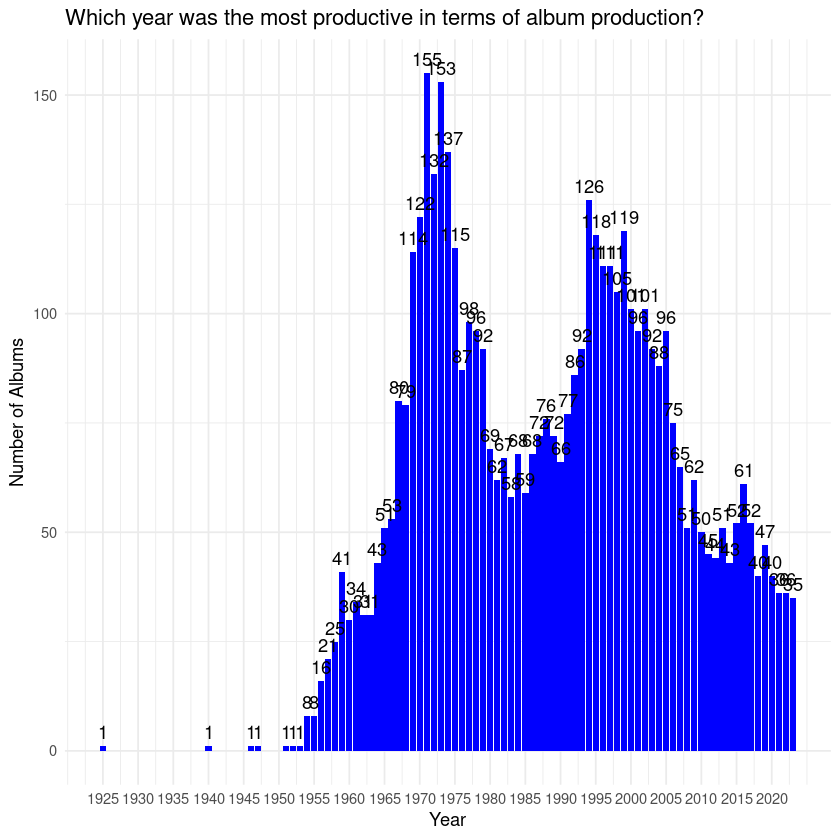

In [ ]:
# Plot the data
p <- ggplot(yearly_counts, aes(x = year, y = count)) +
  geom_bar(stat = "identity", fill = "blue") +
  geom_text(aes(label = count), vjust = -0.5) +
  scale_x_continuous(breaks = seq(min(yearly_counts$year), max(yearly_counts$year), by = 5)) +
  labs(title = "Which year has the most albums in the top 5000 rated?", x = "Year", y = "Number of Albums") +
  theme_minimal()
# Display the plot
print(p)

In [ ]:
# Print the most productive year in terms of album sales
max_year <- yearly_counts[which.max(yearly_counts$count), ]
cat(paste("The most highly rated year in the top 5000 was", max_year$year, "with", max_year$count, "albums."))

The most productive year in terms of album production was 1971 with 155 albums sold.

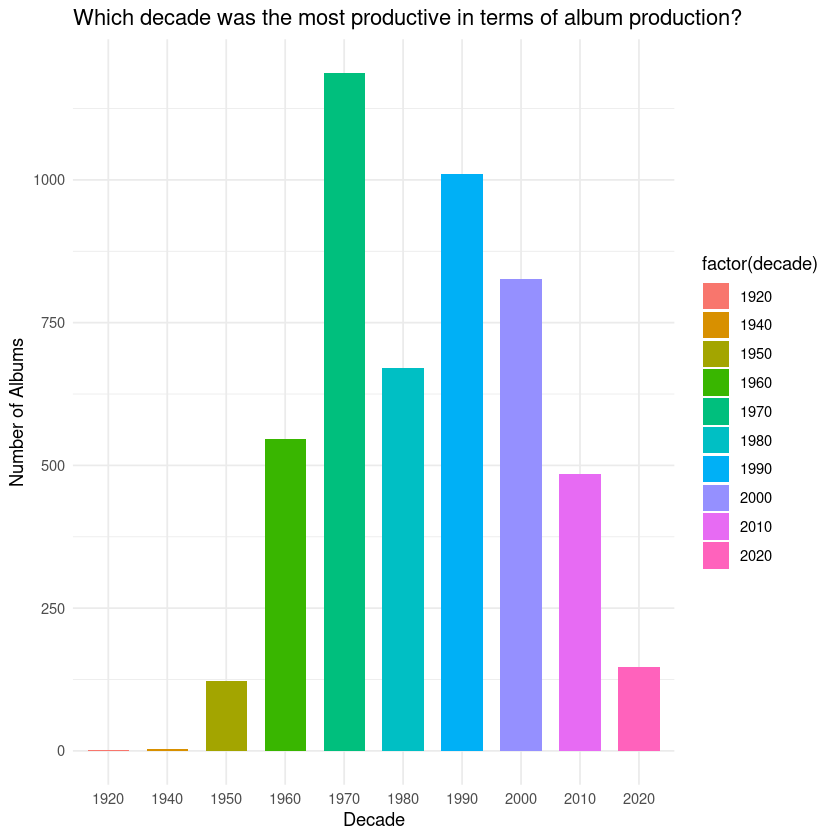

In [ ]:
# Create a new variable for the decade
all_data$decade <- 10 * (all_data$year %/% 10)

# Plotting
ggplot(all_data, aes(x=factor(decade), fill=factor(decade))) + 
  geom_bar(width=0.7) +  
  labs(title="Which decade had the highest rated albums?",
       x="Decade",
       y="Number of Albums") + 
  theme_minimal() +
  scale_x_discrete(breaks = unique(all_data$decade))

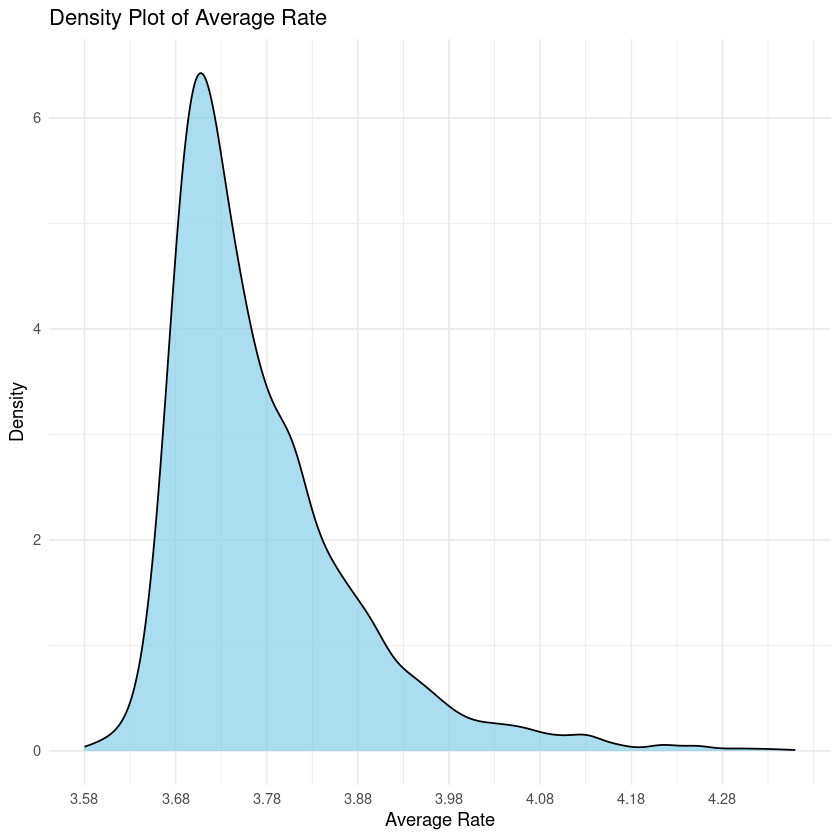

In [ ]:
# Density plot of average rate with x-axis interval of 0.1
p_density <- ggplot(all_data, aes(x = Rating)) +
  geom_density(fill = "skyblue", alpha = 0.7) +
  labs(title = "Density Plot of Average Rate", x = "Average Rate", y = "Density") +
  scale_x_continuous(breaks = seq(min(all_data$Rating), max(all_data$Rating), by = 0.1)) +
  theme_minimal()

# Display the density plot
print(p_density)

In [ ]:
The distribution of mean ratings shows that the most frequent ratings are between 3.68 and 3.78.

In [ ]:
# Ensure necessary library is installed
install.packages("forcats")
install.packages("tidyr")

Installing package into ‘/home/mathuser/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Installing package into ‘/home/mathuser/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)



In [ ]:
# Load the library
library(forcats)
library(tidyr)

In [ ]:
# Separate rows where genre contains commas or another delimiter
all_data_separated <- all_data %>%
  separate_rows(Genres, sep = ",") %>%   # Replace "," with your delimiter if different
  mutate(Genres = trimws(Genres))   # Remove any white space

# Now, re-calculate the genre count
genre_count <- all_data_separated %>%
  group_by(Genres) %>%
  summarise(Count = n()) %>%
  arrange(-Count)

# Select the top 10 genres with the most comments
top_10_genres <- head(genre_count, 10)$Genres

# Filter the data to include only these top 10 genres
filtered_data <- all_data_separated %>% 
  filter(Genres %in% top_10_genres)

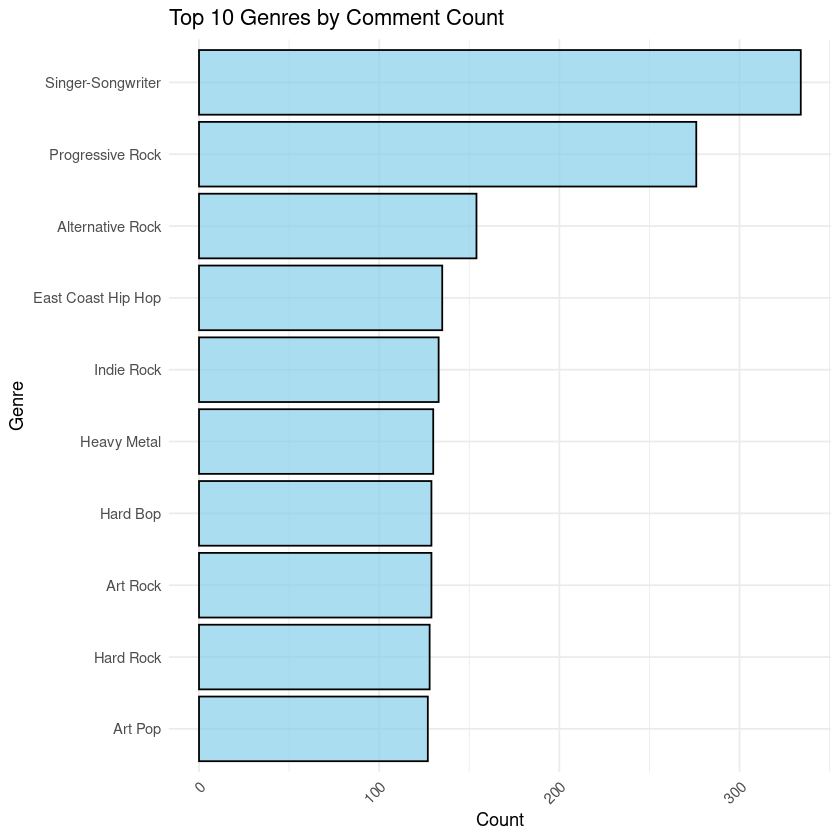

In [ ]:
# Create a horizontal bar chart for the top 10 genres, ordered from highest to lowest
p_histogram <- ggplot(filtered_data, aes(y = fct_reorder(Genres, Genres, .fun = length))) +
  geom_bar(fill = "skyblue", color = "black", alpha = 0.7) +
  labs(title = "Top 10 Genres by Comment Count", x = "Count", y = "Genre") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Display the bar chart
print(p_histogram)

In [ ]:
Singer/Songwriter is most genres 

In [ ]:
# Install package and load library
install.packages(c("tm", "wordcloud", "RColorBrewer"))
library(tm)
library(wordcloud)
library(RColorBrewer)

Installing packages into ‘/home/mathuser/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’, ‘BH’


Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate


Loading required package: RColorBrewer



In [ ]:
# Create a corpus from the 'descriptors' column
corpus <- Corpus(VectorSource(all_data$Descriptors))

# Clean the corpus: convert to lowercase, remove numbers, punctuation, whitespace, and common stopwords
corpus <- corpus %>%
  tm_map(removePunctuation) %>%
  tm_map(stripWhitespace)
corpus <- tm_map(corpus, content_transformer(tolower))
corpus <- tm_map(corpus, removeWords, stopwords("english"))

# Create a matrix
descriptor_tm <- TermDocumentMatrix(corpus) 
descriptor_matrix <- as.matrix(descriptor_tm) 
descriptor_words <- sort(rowSums(descriptor_matrix),decreasing=TRUE) 
descriptor_df <- data.frame(word = names(descriptor_words), freq=descriptor_words)

Warning message in tm_map.SimpleCorpus(., removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(., stripWhitespace):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwords("english")):
“transformation drops documents”


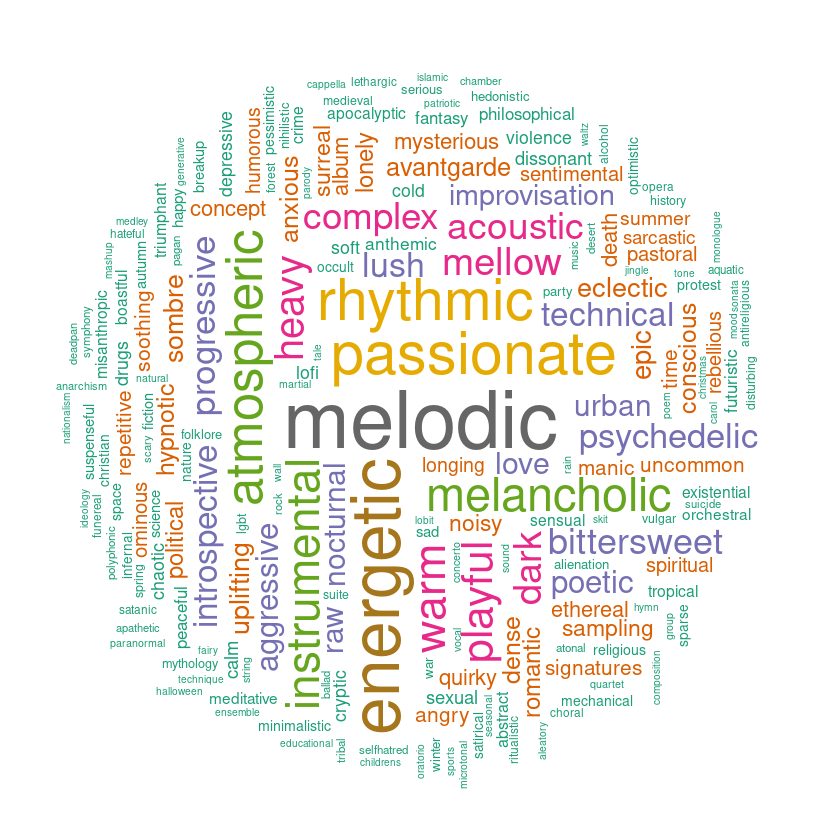

In [ ]:
# Generate the Word Cloud
descriptor_word_cloud <- wordcloud(words = descriptor_df$word, 
                                   freq = descriptor_df$freq, 
                                   min.freq = 1,           
                                   max.words = 4000, 
                                   random.order = FALSE, 
                                   rot.per = 0.5,            
                                   colors = brewer.pal(8, "Dark2"))

In [ ]:
get_rating_from_album_name <- function(album_name) {
    album_name %>%
        gsub(" ", "%20", .) %>%
        paste0("https://rateyourmusic.com/search?searchterm=", .) %>%
        read_html() %>%
        html_element("td") %>%
        html_elements("a") %>%
        .[[2]] %>%
        html_attr("href") %>%
        paste0("https://rateyourmusic.com", .) %>%
        read_html() %>%
        html_element("span .avg_rating") %>%
        html_text2() %>%
        as.numeric()
}


In [ ]:
install.packages("spotifyr")

also installing the dependencies ‘snakecase’, ‘janitor’


Warning message:
“unable to access index for repository https://cran.r-project.org/bin/macosx/el-capitan/contrib/3.6:
  cannot open URL 'https://cran.r-project.org/bin/macosx/el-capitan/contrib/3.6/PACKAGES'”
installing the source packages ‘snakecase’, ‘janitor’, ‘spotifyr’




In [ ]:
Sys.setenv(SPOTIFY_CLIENT_ID = "4897f93fed274f22ae0ab93206c86b68")
Sys.setenv(SPOTIFY_CLIENT_SECRET = "84f21d258b0b4d0a8e2ecf9f077e1204")

In [ ]:
library(spotifyr)
library(tidyverse)
library(dplyr)
library(knitr)
library(rvest)
library(tidyverse)
library(ggridges)

access_token <- get_spotify_access_token()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.2
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding




In [ ]:
## How has the energy of RHCP music changed over time?
## Is the energy of a RHCP album correlated with its album sales?

In [ ]:
rhcp <- get_artist_audio_features('red hot chili peppers')

In [ ]:
head(rhcp)

,artist_name,artist_id,album_id,album_type,album_images,album_release_date,album_release_year,album_release_date_precision,danceability,energy,⋯,track_name,track_preview_url,track_number,type,track_uri,external_urls.spotify,album_name,key_name,mode_name,key_mode
,<chr>,<chr>,<chr>,<chr>,<list>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,0KJc9ksnoJJsdpQxV3z5i1,album,"640 , 300 , 64 , https://i.scdn.co/image/ab67616d0000b273aa50644f05f26e73ba950b8c, https://i.scdn.co/image/ab67616d00001e02aa50644f05f26e73ba950b8c, https://i.scdn.co/image/ab67616d00004851aa50644f05f26e73ba950b8c, 640 , 300 , 64",2022-10-14,2022,day,0.573,0.913,⋯,Tippa My Tongue,https://p.scdn.co/mp3-preview/b8201773e1af3c5fdaa321fb34cf9e75756d82ba?cid=4897f93fed274f22ae0ab93206c86b68,1,track,spotify:track:7BCxIjRsqbc9Yiy2haBCIK,https://open.spotify.com/track/7BCxIjRsqbc9Yiy2haBCIK,Return of the Dream Canteen,F,minor,F minor
2,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,0KJc9ksnoJJsdpQxV3z5i1,album,"640 , 300 , 64 , https://i.scdn.co/image/ab67616d0000b273aa50644f05f26e73ba950b8c, https://i.scdn.co/image/ab67616d00001e02aa50644f05f26e73ba950b8c, https://i.scdn.co/image/ab67616d00004851aa50644f05f26e73ba950b8c, 640 , 300 , 64",2022-10-14,2022,day,0.680,0.679,⋯,Peace and Love,https://p.scdn.co/mp3-preview/a93ec9ed459cf4c2fe6c80b5c1141d0ed10da67a?cid=4897f93fed274f22ae0ab93206c86b68,2,track,spotify:track:3W2reBya7FkjHCP1B2nmQr,https://open.spotify.com/track/3W2reBya7FkjHCP1B2nmQr,Return of the Dream Canteen,A#,major,A# major
3,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,0KJc9ksnoJJsdpQxV3z5i1,album,"640 , 300 , 64 , https://i.scdn.co/image/ab67616d0000b273aa50644f05f26e73ba950b8c, https://i.scdn.co/image/ab67616d00001e02aa50644f05f26e73ba950b8c, https://i.scdn.co/image/ab67616d00004851aa50644f05f26e73ba950b8c, 640 , 300 , 64",2022-10-14,2022,day,0.663,0.710,⋯,Reach Out,https://p.scdn.co/mp3-preview/eccd28cee4146ab727693a9bd3119b056c897407?cid=4897f93fed274f22ae0ab93206c86b68,3,track,spotify:track:00B7SBwrjbycLMOgAmeIU8,https://open.spotify.com/track/00B7SBwrjbycLMOgAmeIU8,Return of the Dream Canteen,B,minor,B minor
4,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,0KJc9ksnoJJsdpQxV3z5i1,album,"640 , 300 , 64 , https://i.scdn.co/image/ab67616d0000b273aa50644f05f26e73ba950b8c, https://i.scdn.co/image/ab67616d00001e02aa50644f05f26e73ba950b8c, https://i.scdn.co/image/ab67616d00004851aa50644f05f26e73ba950b8c, 640 , 300 , 64",2022-10-14,2022,day,0.515,0.809,⋯,Eddie,https://p.scdn.co/mp3-preview/2146a69931d60eb834c8a41315ee7d962567325b?cid=4897f93fed274f22ae0ab93206c86b68,4,track,spotify:track:0G1BEi8ByngMCJqcPnDACw,https://open.spotify.com/track/0G1BEi8ByngMCJqcPnDACw,Return of the Dream Canteen,A,minor,A minor
5,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,0KJc9ksnoJJsdpQxV3z5i1,album,"640 , 300 , 64 , https://i.scdn.co/image/ab67616d0000b273aa50644f05f26e73ba950b8c, https://i.scdn.co/image/ab67616d00001e02aa50644f05f26e73ba950b8c, https://i.scdn.co/image/ab67616d00004851aa50644f05f26e73ba950b8c, 640 , 300 , 64",2022-10-14,2022,day,0.599,0.777,⋯,Fake as Fu@k,https://p.scdn.co/mp3-preview/0c6b456dfc40827ab2da4dab414dd029fae2e034?cid=4897f93fed274f22ae0ab93206c86b68,5,track,spotify:track:7cpC2EuFMexgy392K13RZb,https://open.spotify.com/track/7cpC2EuFMexgy392K13RZb,Return of the Dream Canteen,G#,minor,G# minor
6,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,0KJc9ksnoJJsdpQxV3z5i1,album,"640 , 300 , 64 , https://i.scdn.co/image/ab67616d0000b273aa50644f05f26e73ba950b8c, https://i.scdn.co/image/ab67616d00001e02aa50644f05f26e73ba950b8c, https://i.scdn.co/image/ab67616d00004851aa50644f05f26e73ba950b8c, 640 , 300 , 64",2022-10-14,2022,day,0.492,0.815,⋯,Bella,https://p.scdn.co/mp3-preview/10379f8e3e11558025d68f9ef26be4033493cca6?cid=4897f93fed274f22ae0ab93206c86b68,6,track,spotify:track:2dbA4sPwu3iK72c0mA6907,https://open.spotify.com/track/2dbA4sPwu3iK72c0mA6907,Return of the Dream Canteen,G

In [ ]:
## Average energy by album
album.energy <- rhcp %>% 
  group_by(album_name) %>% 
  summarise(energy = mean(energy), release = mean(album_release_year)) 

In [ ]:
## Remove non-deluxe versions of repeated albums
album.energy2 <- subset(album.energy,
                          !album_name %in% c("One Hot Minute", 
                                             "Californication",
                                             "By the Way"))
album.energy2

album_name,energy,release
<chr>,<dbl>,<dbl>
Blood Sugar Sex Magik (Deluxe Edition),0.7528421,1991
By the Way (Deluxe Edition),0.8266667,2002
Californication (Deluxe Edition),0.8450000,1999
Freaky Styley,0.8505556,1985
I'm with You,0.8624286,2011
Mother's Milk,0.9309474,1989
One Hot Minute (Deluxe Edition),0.7637500,1995
Red Hot Chili Peppers,0.8293125,1984
Return of the Dream Canteen,0.7112353,2022


In [ ]:
## Ordered from earliest to latest
energy.ordered <- 
  album.energy2[order(album.energy2$release, decreasing = F),]
energy.ordered

album_name,energy,release
<chr>,<dbl>,<dbl>
Red Hot Chili Peppers,0.8293125,1984
Freaky Styley,0.8505556,1985
The Uplift Mofo Party Plan,0.9155833,1987
Mother's Milk,0.9309474,1989
Blood Sugar Sex Magik (Deluxe Edition),0.7528421,1991
One Hot Minute (Deluxe Edition),0.7637500,1995
Californication (Deluxe Edition),0.8450000,1999
By the Way (Deluxe Edition),0.8266667,2002
Stadium Arcadium,0.7801034,2006


In [ ]:
## Ordered from most energy to least
album.energy2[order(album.energy2$energy, decreasing = T),]
## 3 of the 4 most energetic albums were released in the 80s, before they were 
## mainstream.


album_name,energy,release
<chr>,<dbl>,<dbl>
Mother's Milk,0.9309474,1989
The Uplift Mofo Party Plan,0.9155833,1987
I'm with You,0.8624286,2011
Freaky Styley,0.8505556,1985
Californication (Deluxe Edition),0.8450000,1999
Red Hot Chili Peppers,0.8293125,1984
By the Way (Deluxe Edition),0.8266667,2002
Stadium Arcadium,0.7801034,2006
One Hot Minute (Deluxe Edition),0.7637500,1995


In [ ]:
## Top 5 energy tracks
rhcp %>% 
  arrange(-energy) %>% 
  select(track_name, energy, album_release_year) %>% 
  head(5)
## All of the 5 most energetic tracks released by the RHCP
## were released in the 80s.

,track_name,energy,album_release_year
,<chr>,<dbl>,<dbl>
1,Catholic School Girls Rule - Remastered,0.998,1985
2,Subway To Venus - Remastered,0.997,1989
3,"Johnny, Kick A Hole In The Sky - Remastered",0.997,1989
4,Me And My Friends,0.996,1987
5,Freaky Styley - Remastered,0.996,1985


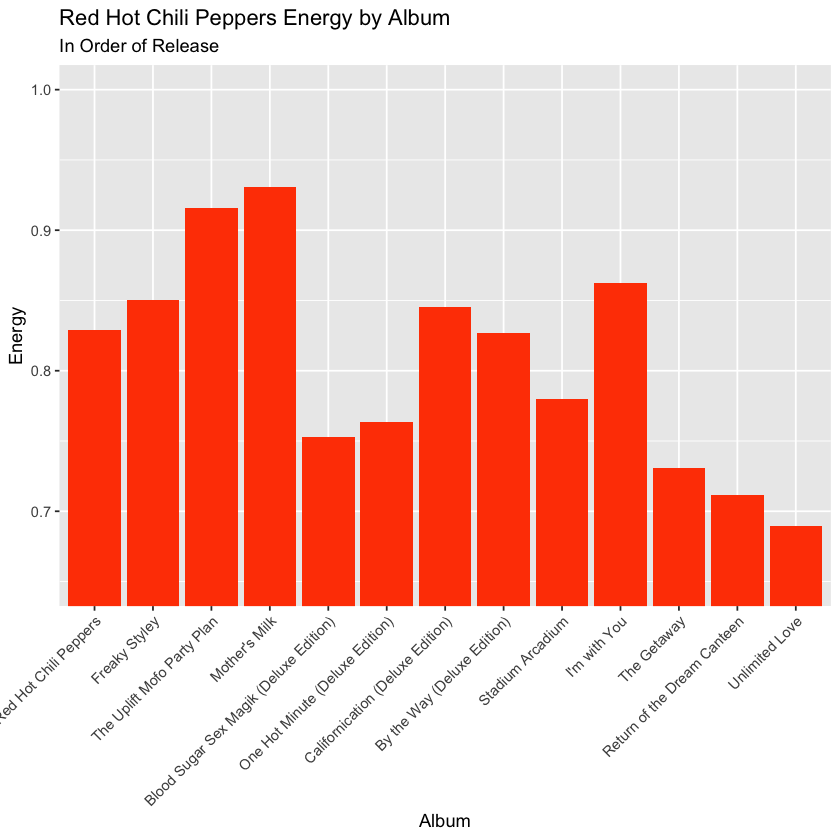

In [ ]:
## Plot release vs energy
ggplot(energy.ordered, aes(x = reorder(album_name, release), y = energy)) +
  geom_bar(stat = "identity", fill = "orangered") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  xlab("Album") +
  ylab("Energy") +
  coord_cartesian(ylim = c(0.65,1)) +
  ggtitle("Red Hot Chili Peppers Energy by Album",
          subtitle = "In Order of Release")

Picking joint bandwidth of 0.0645



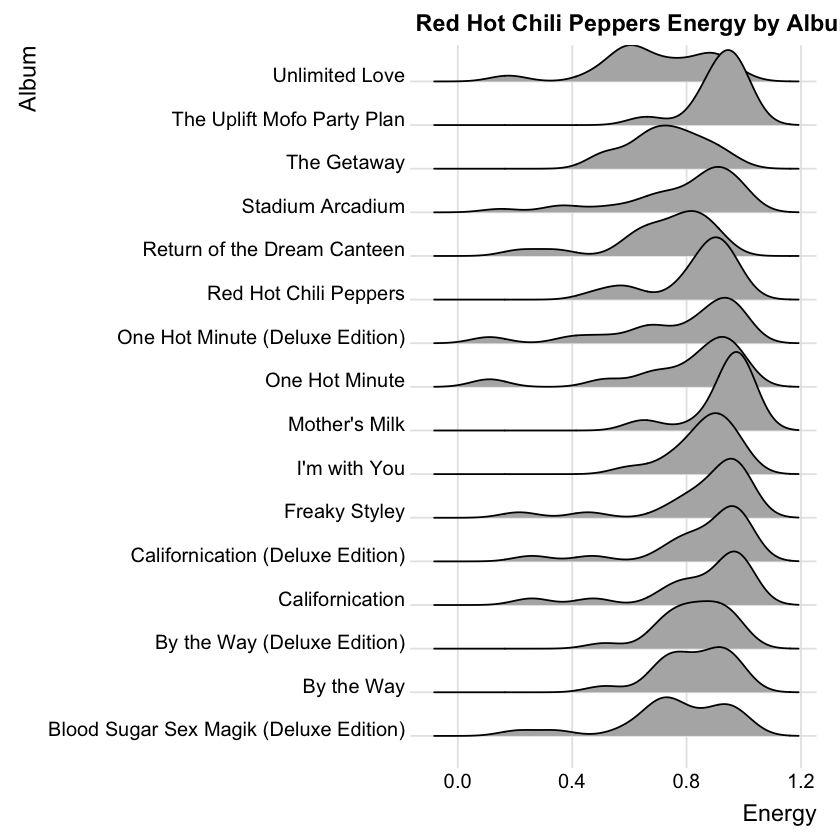

In [ ]:
## Density plot of album energy
ggplot(rhcp, aes(x = energy, y = album_name)) + 
  geom_density_ridges() + 
  theme_ridges() +
  xlab("Energy") +
  ylab("Album") +
  ggtitle("Red Hot Chili Peppers Energy by Album")

In [ ]:
## Album dataframe
rhcp.albums <- subset(get_artist_albums('0L8ExT028jH3ddEcZwqJJ5'), 
                      album_type == 'album')
head(rhcp.albums)

,album_group,album_type,artists,available_markets,href,id,images,name,release_date,release_date_precision,total_tracks,type,uri,external_urls.spotify
,<chr>,<chr>,<list>,<list>,<chr>,<chr>,<list>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,album,album,"https://api.spotify.com/v1/artists/0L8ExT028jH3ddEcZwqJJ5, 0L8ExT028jH3ddEcZwqJJ5 , Red Hot Chili Peppers , artist , spotify:artist:0L8ExT028jH3ddEcZwqJJ5 , https://open.spotify.com/artist/0L8ExT028jH3ddEcZwqJJ5","AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, CY, CZ, DK, DO, DE, EC, EE, SV, FI, FR, GR, GT, HN, HK, HU, IS, IE, IT, LV, LT, LU, MY, MT, MX, NL, NZ, NI, NO, PA, PY, PE, PH, PL, PT, SG, SK, ES, SE, CH, TW, TR, UY, US, GB, AD, LI, MC, ID, JP, TH, VN, RO, IL, ZA, SA, AE, BH, QA, OM, KW, EG, MA, DZ, TN, LB, JO, PS, IN, KZ, MD, UA, AL, BA, HR, ME, MK, RS, SI, KR, BD, PK, LK, GH, KE, NG, TZ, UG, AG, AM, BS, BB, BZ, BT, BW, BF, CV, CW, DM, FJ, GM, GE, GD, GW, GY, HT, JM, KI, LS, LR, MW, MV, ML, MH, FM, NA, NR, NE, PW, PG, WS, SM, ST, SN, SC, SL, SB, KN, LC, VC, SR, TL, TO, TT, TV, VU, AZ, BN, BI, KH, CM, TD, KM, GQ, SZ, GA, GN, KG, LA, MO, MR, MN, NP, RW, TG, UZ, ZW, BJ, MG, MU, MZ, AO, CI, DJ, ZM, CD, CG, IQ, LY, TJ, VE, ET, XK",https://api.spotify.com/v1/albums/0KJc9ksnoJJsdpQxV3z5i1,0KJc9ksnoJJsdpQxV3z5i1,"640 , 300 , 64 , https://i.scdn.co/image/ab67616d0000b273aa50644f05f26e73ba950b8c, https://i.scdn.co/image/ab67616d00001e02aa50644f05f26e73ba950b8c, https://i.scdn.co/image/ab67616d00004851aa50644f05f26e73ba950b8c, 640 , 300 , 64",Return of the Dream Canteen,2022-10-14,day,17,album,spotify:album:0KJc9ksnoJJsdpQxV3z5i1,https://open.spotify.com/album/0KJc9ksnoJJsdpQxV3z5i1
2,album,album,"https://api.spotify.com/v1/artists/0L8ExT028jH3ddEcZwqJJ5, 0L8ExT028jH3ddEcZwqJJ5 , Red Hot Chili Peppers , artist , spotify:artist:0L8ExT028jH3ddEcZwqJJ5 , https://open.spotify.com/artist/0L8ExT028jH3ddEcZwqJJ5","AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, CY, CZ, DK, DO, DE, EC, EE, SV, FI, FR, GR, GT, HN, HK, HU, IS, IE, IT, LV, LT, LU, MY, MT, MX, NL, NZ, NI, NO, PA, PY, PE, PH, PL, PT, SG, SK, ES, SE, CH, TW, TR, UY, US, GB, AD, LI, MC, ID, JP, TH, VN, RO, IL, ZA, SA, AE, BH, QA, OM, KW, EG, MA, DZ, TN, LB, JO, PS, IN, KZ, MD, UA, AL, BA, HR, ME, MK, RS, SI, KR, BD, PK, LK, GH, KE, NG, TZ, UG, AG, AM, BS, BB, BZ, BT, BW, BF, CV, CW, DM, FJ, GM, GE, GD, GW, GY, HT, JM, KI, LS, LR, MW, MV, ML, MH, FM, NA, NR, NE, PW, PG, WS, SM, ST, SN, SC, SL, SB, KN, LC, VC, SR, TL, TO, TT, TV, VU, AZ, BN, BI, KH, CM, TD, KM, GQ, SZ, GA, GN, KG, LA, MO, MR, MN, NP, RW, TG, UZ, ZW, BJ, MG, MU, MZ, AO, CI, DJ, ZM, CD, CG, IQ, LY, TJ, VE, ET, XK",https://api.spotify.com/v1/albums/2ITVvrNiINKRiW7wA3w6w6,2ITVvrNiINKRiW7wA3w6w6,"640 , 300 , 64 , https://i.scdn.co/image/ab67616d0000b27397a52e0aeda9d95fb881c56d, https://i.scdn.co/image/ab67616d00001e0297a52e0aeda9d95fb881c56d, https://i.scdn.co/image/ab67616d0000485197a52e0aeda9d95fb881c56d, 640 , 300 , 64",Unlimited Love,2022-04-01,day,17,album,spotify:album:2ITVvrNiINKRiW7wA3w6w6,https://open.spotify.com/album/2ITVvrNiINKRiW7wA3w6w6
3,album,album,"https://api.spotify.com/v1/artists/0L8ExT028jH3ddEcZwqJJ5, 0L8ExT028jH3ddEcZwqJJ5 , Red Hot Chili Peppers , artist , spotify:artist:0L8ExT028jH3ddEcZwqJJ5 , https://open.spotify.com/artist/0L8ExT028jH3ddEcZwqJJ5","AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, CY, CZ, DK, DO, DE, EC, EE, SV, FI, FR, GR, GT, HN, HK, HU, IS, IE, IT, LV, LT, LU, MY, MT, MX, NL, NZ, NI, NO, PA, PY, PE, PH, PL, PT, SG, SK, ES, SE, CH, TW, TR, UY, US, GB, AD, LI, MC, ID, JP, TH, VN, RO, IL, ZA, SA, AE, BH, QA, OM, KW, EG, MA, DZ, TN, LB, JO, PS, IN, BY, KZ, MD, UA, AL, BA, HR, ME, MK, RS, SI, KR, BD, PK, LK, GH, KE, NG, TZ, UG, AG, AM, BS, BB, BZ, BT, BW, BF, CV, CW, DM, FJ, GM, GE, GD, GW, GY, HT, JM, KI, LS, LR, MW, MV, ML, MH, FM, NA, NR, NE, PW, PG, WS, SM, ST, SN, SC, SL, SB, KN, LC, VC, SR, TL, TO, TT, TV, VU, AZ, BN, BI, KH, CM, TD, KM, GQ, SZ, GA, GN, KG, LA, MO, MR, MN, NP, RW, TG, UZ, ZW, BJ, MG, MU, MZ, AO, CI, DJ, ZM, CD, CG, IQ

In [ ]:
## Album list with release dates
subset(rhcp.albums[order(rhcp.albums$release_date, decreasing = F),]) %>% 
  select(name, release_date)

,name,release_date
,<chr>,<chr>
16,Red Hot Chili Peppers,1984-08-10
15,Freaky Styley,1985-08-16
14,The Uplift Mofo Party Plan,1987
13,Mother's Milk,1989-08-16
12,Blood Sugar Sex Magik (Deluxe Edition),1991-09-24
10,One Hot Minute (Deluxe Edition),1995-09-12
11,One Hot Minute,1995-09-12
8,Californication (Deluxe Edition),1999-06-08
9,Californication,1999-06-08


In [ ]:
rhcp.albums <- subset(get_artist_albums('0L8ExT028jH3ddEcZwqJJ5'), album_type == 'album')
#head(rhcp.albums)

In [ ]:
## RHCP Album Sales
get_top_selling_albums <- function(artist) {
  albums <- "https://bestsellingalbums.org/artist/" %>%
    paste0(artist) %>%
    read_html() %>%
    html_elements(".album_card")
  
  tibble(
    Name = albums %>%
      html_element(".album") %>%
      html_text2(),
    Artist = albums %>%
      html_element(".artist") %>%
      html_text2(),
    Sales = albums %>%
      html_nodes(".sales") %>%
      html_text2() %>%
      gsub("\\D", "", .) %>%
      as.numeric(),
    Rank = albums %>%
      html_element(".rank") %>%
      html_text() %>%
      as.numeric(),
    `Rank (All time)` = albums %>%
      html_nodes(".ranks_row") %>%
      html_element(":nth-child(3)") %>%
      html_text() %>%
      gsub("\\D", "", .) %>%
      as.numeric()
  )
}

In [ ]:
rhcp.sales <- get_top_selling_albums(10884)
rhcp.sales

Name,Artist,Sales,Rank,Rank (All time)
<chr>,<chr>,<dbl>,<dbl>,<dbl>
CALIFORNICATION (1999),RED HOT CHILI PEPPERS,16000000,1,111
BLOOD SUGAR SEX MAGIK (1991),RED HOT CHILI PEPPERS,10130420,2,249
BY THE WAY (2002),RED HOT CHILI PEPPERS,7640368,3,395
GREATEST HITS (2003),RED HOT CHILI PEPPERS,6130231,4,570
STADIUM ARCADIUM (2006),RED HOT CHILI PEPPERS,5491949,5,676
ONE HOT MINUTE (1995),RED HOT CHILI PEPPERS,3555000,6,1175
WHAT HITS!? (1992),RED HOT CHILI PEPPERS,1482352,7,3364
I'M WITH YOU (2011),RED HOT CHILI PEPPERS,1397524,8,3499
MOTHER'S MILK (1989),RED HOT CHILI PEPPERS,1110000,9,4462


In [ ]:
## Create new dataframe with sales data
sales.energy <- data.frame(album_name = energy.ordered$album_name,
                           release = energy.ordered$release,
                           energy = energy.ordered$energy,
                           sales = c(NA, rhcp.sales$Sales[14], 
                                     rhcp.sales$Sales[11], rhcp.sales$Sales[9], 
                                     rhcp.sales$Sales[2], rhcp.sales$Sales[6], 
                                     rhcp.sales$Sales[1], rhcp.sales$Sales[3], 
                                     rhcp.sales$Sales[5], rhcp.sales$Sales[8], 
                                     rhcp.sales$Sales[10], NA, 
                                     rhcp.sales$Sales[13]))

In [ ]:
## Remove missing values
sales.energy <- na.omit(sales.energy)
sales.energy


,album_name,release,energy,sales
,<fct>,<dbl>,<dbl>,<dbl>
2,Freaky Styley,1985,0.8505556,60000
3,The Uplift Mofo Party Plan,1987,0.9155833,500000
4,Mother's Milk,1989,0.9309474,1110000
5,Blood Sugar Sex Magik (Deluxe Edition),1991,0.7528421,10130420
6,One Hot Minute (Deluxe Edition),1995,0.7637500,3555000
7,Californication (Deluxe Edition),1999,0.8450000,16000000
8,By the Way (Deluxe Edition),2002,0.8266667,7640368
9,Stadium Arcadium,2006,0.7801034,5491949
10,I'm with You,2011,0.8624286,1397524


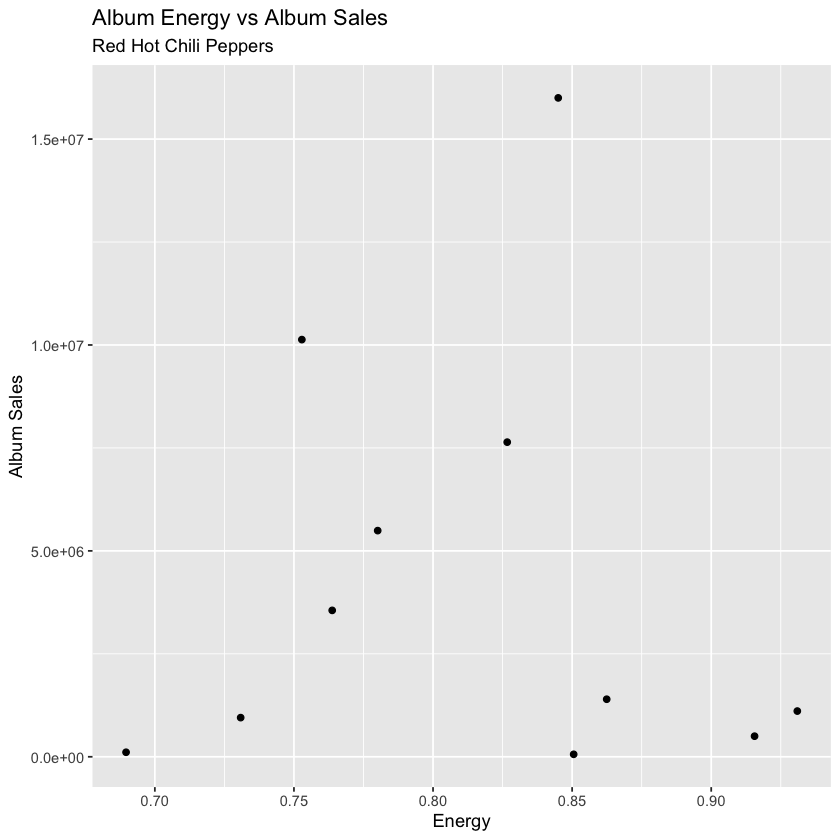

In [ ]:
## Scatterplot energy vs sales
ggplot(sales.energy, aes(x = energy, y = sales)) +
  geom_point() +
  xlab("Energy") +
  ylab("Album Sales") +
  ggtitle("Album Energy vs Album Sales", subtitle = "Red Hot Chili Peppers")
## Below energy of 0.85, we see a positive relationship between album energy and
## sales. However, there is no relationship at very high energy levels.

In [ ]:
cor(sales.energy$energy, sales.energy$sales)

[1] -0.05336852